In [ ]:
import numpy as np
import pandas as pd 

import os 
import shutil

from sklearn.model_selection import train_test_split
# from sklearn.manifold import Isomap
# from sklearn.decomposition import PCA 


import matplotlib.pyplot as plt         # Importing seaborn and matplotlib library for graphics
import seaborn as sns                   
from warnings import filterwarnings     # import filterwarnings to avoid warnings

In [ ]:
# Install Kaggle
!pip install -q kaggle
# Import Kaggle.json file
if not os.path.exists("./kaggle.json"):
  from google.colab import files
  files.upload()
# Create a Kaggle folder
if not os.path.exists(os.path.expanduser('~/.kaggle')):
  os.mkdir(os.path.expanduser('~/.kaggle'))
  #!mkdir '~/.kaggle'
# Copy the Kaggle.json to folder created
!cp kaggle.json ~/.kaggle
# Permissions
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 4.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=3e439d8a2f782356cf17691aa07254aee03470d0e8a3aed72fa5125058a52cb8
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c kitchenware-classification
!mkdir data
!unzip kitchenware-classification.zip -d data > /dev/null
!rm kitchenware-classification.zip

100% 1.63G/1.63G [01:25<00:00, 23.8MB/s]
100% 1.63G/1.63G [01:25<00:00, 20.6MB/s]


In [ ]:
df_train = pd.read_csv('data/train.csv', dtype={'Id': str})
df_train['filename'] = 'data/images/' + df_train['Id'] + '.jpg'
df_train

,Id,label,filename
0,0560,glass,data/images/0560.jpg
1,4675,cup,data/images/4675.jpg
2,0875,glass,data/images/0875.jpg
3,4436,spoon,data/images/4436.jpg
4,8265,plate,data/images/8265.jpg
...,...,...,...
5554,6742,cup,data/images/6742.jpg
5555,1574,cup,data/images/1574.jpg
5556,6746,knife,data/images/6746.jpg
5557,3562,cup,data/images/3562.jpg


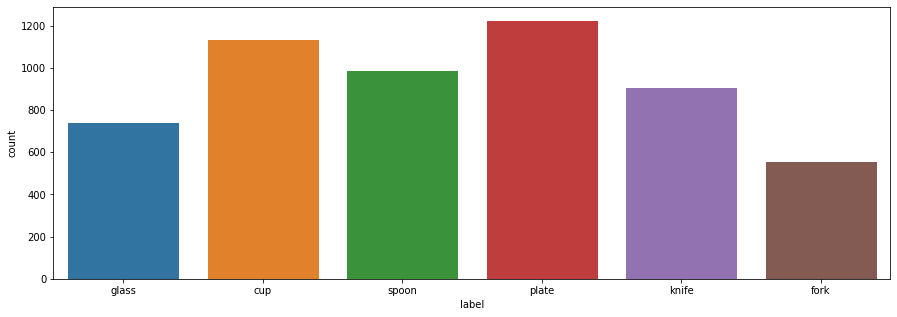

In [ ]:
""""
plt.subplots:
-Create a figure and a set of subplots.
-This utility wrapper makes it convenient to create common layouts of subplots, 
including the enclosing figure object, in a single call.
"""

fig, ax = plt.subplots(figsize=(15, 5))  # figsize=(15, 5)   , size of the plot
sns.set_style('darkgrid')                # set_style method , modifies the style of  the grid
sns.countplot(data = df_train,           # data = df        , choose the dataframe
              x ='label')                # x ='label'       , feature to be plotted on the x-axis
plt.show()                               # show the plot

# Extra-data

In [ ]:
# !kaggle datasets download -d agrigorev/kitchenware-extra-images
# !mkdir extra-data
# !unzip kitchenware-extra-images.zip -d extra-data > /dev/null
# !rm kitchenware-extra-images.zip

In [ ]:
# df_extra_train = pd.read_csv('extra-data/data.csv')
# df_extra_train['filename'] = 'extra-data/data/' + df_extra_train['Id'] + '.jpg'
# df_extra_train

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))  # figsize=(15, 5)  , size of the plot
# sns.set_style('darkgrid')                # set_style method , modifies the style of  the grid
# sns.countplot(data = df_extra_train,     # data = df        , choose the dataframe
#               x ='label')                # x ='label'       , feature to be plotted on the x-axis
# plt.show()                               # show the plot

# Making directories

In [ ]:
def Making_Directory(ProjectDirectory,
                     Directories,
                     DataFrame,
                     FullTrainSize,
                     RandomState):    
        
    df_Full_Train, df_Test = train_test_split(DataFrame,
                                              train_size = FullTrainSize,              
                                              random_state = RandomState,
                                              stratify = DataFrame['label']) 
    
    df_Train, df_Val = train_test_split(df_Full_Train,
                                        train_size = 0.75,
                                        random_state = RandomState,            
                                        stratify = df_Full_Train['label']) 
    
    df_Tuple = (df_Full_Train, df_Test, df_Train, df_Val)

    df_Dictionary = dict(zip(Directories, df_Tuple))

    CategoryArray = np.unique(DataFrame['label']) 

    # Directory   
    if not os.path.exists(ProjectDirectory):
        os.mkdir(ProjectDirectory) 

    # SubDirectory
    for k, v in df_Dictionary.items():

      if not os.path.exists(f"{ProjectDirectory}/{k}"):
        os.mkdir(f"{ProjectDirectory}/{k}")

      #print(f"Subdirectory: {k}\tDimensions: {v.shape}")

      for j in CategoryArray:

        if not os.path.exists(f"{ProjectDirectory}/{k}/{j}"):
          os.mkdir(f"{ProjectDirectory}/{k}/{j}")

        df_Category = v[v['label']==j]

        for i in df_Category['filename'].to_list():
          shutil.copy(i, f"{ProjectDirectory}/{k}/{j}")

        #print(f"\tCategoryArray : {j}\tDimensions : {df_Category.shape}")

    return df_Full_Train, df_Test, df_Train, df_Val

In [ ]:
Dir_Data = "Kitchenware_data"

Dir = ("Full_Train", "Test", "Train", "Val")

Full_Train_Size = 0.8
Random_State = 1

df_Full_Train, df_Test, df_Train, df_Val = Making_Directory(ProjectDirectory= Dir_Data,
                                                            Directories = Dir,
                                                            DataFrame = df_train,
                                                            FullTrainSize = Full_Train_Size,
                                                            RandomState = Random_State)

Subdirectory: Full_Train	Dimensions: (4447, 3)
	CategoryArray : cup	Dimensions : (908, 3)
	CategoryArray : fork	Dimensions : (446, 3)
	CategoryArray : glass	Dimensions : (594, 3)
	CategoryArray : knife	Dimensions : (727, 3)
	CategoryArray : plate	Dimensions : (981, 3)
	CategoryArray : spoon	Dimensions : (791, 3)
Subdirectory: Test	Dimensions: (1112, 3)
	CategoryArray : cup	Dimensions : (227, 3)
	CategoryArray : fork	Dimensions : (111, 3)
	CategoryArray : glass	Dimensions : (148, 3)
	CategoryArray : knife	Dimensions : (182, 3)
	CategoryArray : plate	Dimensions : (246, 3)
	CategoryArray : spoon	Dimensions : (198, 3)
Subdirectory: Train	Dimensions: (3335, 3)
	CategoryArray : cup	Dimensions : (681, 3)
	CategoryArray : fork	Dimensions : (335, 3)
	CategoryArray : glass	Dimensions : (445, 3)
	CategoryArray : knife	Dimensions : (545, 3)
	CategoryArray : plate	Dimensions : (736, 3)
	CategoryArray : spoon	Dimensions : (593, 3)
Subdirectory: Val	Dimensions: (1112, 3)
	CategoryArray : cup	Dimensio

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
TamImagen =  299
batch_size = 32

train_data_gen = ImageDataGenerator(zoom_range =   [0.80, 1.0],
                                    brightness_range =[0.8,1.2],
                                    vertical_flip = True,  
                                    horizontal_flip = True, 
                                    #shear_range = 30,
                                    #rotation_range = 90,                                
                                    preprocessing_function=keras.applications.xception.preprocess_input)

test_data_gen = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = train_data_gen.flow_from_directory("./Kitchenware_data/Full_Train", 
                                                     (TamImagen, TamImagen),
                                                     batch_size = batch_size,
                                                     class_mode = "categorical")

valid_generator = test_data_gen.flow_from_directory("./Kitchenware_data/Test", 
                                                     (TamImagen, TamImagen),
                                                     batch_size = batch_size,
                                                     class_mode = "categorical")

Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.


In [ ]:
import keras.applications

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,GlobalAveragePooling2D,Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import SGD

In [ ]:
!pip uninstall imgaug
!pip install imgaug==0.2.6

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 631 kB 6.4 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=2d7dd72dcd50e92eecec2e0b0baf313641cadee068e1960e1becec1871ac9ca1
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug


In [ ]:
!pip install --quiet optuna

     |████████████████████████████████| 348 kB 32.8 MB/s 
     |████████████████████████████████| 81 kB 11.4 MB/s 
     |████████████████████████████████| 210 kB 53.2 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 147 kB 79.1 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 112 kB 69.4 MB/s 


In [ ]:
#optuna library
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState

# Model


In [ ]:
""" Define objective function for the structure of the CNN """

def create_model(trial):

    BaseModel = tf.keras.applications.Xception(weights = "imagenet",
                                              input_shape=(299, 299, 3),
                                              include_top = False)
    BaseModel.trainable = False
    inputs = Input(shape=(299, 299, 3))
    x = BaseModel(inputs, training=False)
    x = GlobalAveragePooling2D()(x)

    n_layers = trial.suggest_int("n_layers", 1, 6,step=1)                 # Number of hidden layers
    # Number of neurons and activation function of each Hidden layer
    for i in range(n_layers):
        num_hidden = trial.suggest_int(f'n_units_L{i}',                   # Number of neurons for the ith hidden layer
                                       32, 512, step = 32)      
        # Activation function for the ith hidden layer
        func_activation = trial.suggest_categorical( f'f_activation_L{i}',
                                                    ['relu','sigmoid','tanh','selu','elu'])
        x = Dense(units=num_hidden,
                        activation=func_activation)(x)
        # Dropout Layer
        dropout = trial.suggest_categorical(f'dropout_L{i}',              
                                            [0.0,0.2,0.4,0.6,0.8])
        x = Dropout(rate=dropout)(x)

    # Output layer (Number of dependent variables)
    outputs = Dense(units=6, 
                    activation = "softmax")(x)                            # Activation function for the output layer

    model = Model(inputs, outputs)

    # Compile the model with a sampled learning rate.
    learning_rate = trial.suggest_float("learning_rate",                  # Range of learning rate values
                                        1e-5, 1e-2,
                                        log=True) 
    momentum = trial.suggest_float("momentum",                                # 
                                    1e-2, 1e0, log=True)

    model.compile(loss="categorical_crossentropy",                             # Computes the cross-entropy loss between true labels and predicted labels
                  optimizer=SGD(learning_rate = learning_rate,
                                momentum=momentum),
                  metrics="accuracy")

    return model

"""  Define objective function for Optuna """

def objective(trial):
    
    # Generate our trial model
    model = create_model(trial)

    ####
    if os.path.exists("Kitchenware_data"):
      shutil.rmtree('Kitchenware_data')

    Dir_Data = "Kitchenware_data"
    Dir = ("Full_Train", "Test", "Train", "Val")

    Full_Train_Size = 0.8
    Random_State = trial.suggest_int("random_state", 1, 2000, step=1)             

    df_Full_Train, df_Test, df_Train, df_Val = Making_Directory(ProjectDirectory= Dir_Data,
                                                                Directories = Dir,
                                                                DataFrame = df_train,
                                                                FullTrainSize = Full_Train_Size,
                                                                RandomState = Random_State)
    ####
    TamImagen =  299
    batch_size = 32

    train_data_gen = ImageDataGenerator(zoom_range =   [0.80, 1.0],
                                        brightness_range =[0.8,1.2],
                                        vertical_flip = True,  
                                        horizontal_flip = True, 
                                        #shear_range = 30,
                                        #rotation_range = 90,                                
                                        preprocessing_function=keras.applications.xception.preprocess_input)

    test_data_gen = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)

    train_generator = train_data_gen.flow_from_directory("./Kitchenware_data/Full_Train", 
                                                        (TamImagen, TamImagen),
                                                        batch_size = batch_size,
                                                        class_mode = "categorical")

    valid_generator = test_data_gen.flow_from_directory("./Kitchenware_data/Test", 
                                                        (TamImagen, TamImagen),
                                                        batch_size = batch_size,
                                                        class_mode = "categorical")

    ####
    model.fit(train_generator,
              steps_per_epoch = train_generator.n//batch_size,
              validation_data = valid_generator,
              validation_steps = valid_generator.n//batch_size,
              epochs= trial.suggest_categorical("epochs", [20]), 
              callbacks=[TFKerasPruningCallback(trial, "val_accuracy")],
              workers=8,
              verbose = 1)

    # Evaluate the model accuracy on the validation set in each trial
    score = model.evaluate(valid_generator, verbose=0)
    
    return score[1]


In [ ]:
def MakeTrial(study_name, n_trials=None,timeout=None):
  
  print(f"\nStarting Trial: {study_name}\n")

  study = optuna.create_study(study_name=study_name,
                              direction="maximize",
                              pruner=optuna.pruners.MedianPruner())
  
  # Set 'n_trials' and/or 'timeout' in seconds for optimization 
  study.optimize(objective, n_trials=n_trials, timeout=timeout)
  pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
  complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

  print(f"\nTrial Completed: {study_name}\n")

  return study, pruned_trials, complete_trials

In [ ]:
study_name = f"Kitchenware_CNN" 
# Set 'n_trials' and/or 'timeout' in seconds for optimization 
study, pruned_trials, complete_trials = MakeTrial(study_name, timeout=18000 ) # 5 hours 1:35-6:35

[I 2022-12-26 18:34:04,197] A new study created in memory with name: Kitchenware_CNN



Starting Trial: Kitchenware_CNN

Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 43s 282ms/step - loss: 1.4024 - accuracy: 0.4580 - val_loss: 0.7124 - val_accuracy: 0.8759
Epoch 2/20
138/138 [==============================] - 40s 277ms/step - loss: 0.7585 - accuracy: 0.7592 - val_loss: 0.4111 - val_accuracy: 0.9393
Epoch 3/20
138/138 [==============================] - 41s 280ms/step - loss: 0.5538 - accuracy: 0.8267 - val_loss: 0.3034 - val_accuracy: 0.9430
Epoch 4/20
138/138 [==============================] - 41s 283ms/step - loss: 0.4465 - accuracy: 0.8609 - val_loss: 0.2496 - val_accuracy: 0.9485
Epoch 5/20
138/138 [==============================] - 42s 291ms/step - loss: 0.3815 - accuracy: 0.8802 - val_loss: 0.2196 - val_accuracy: 0.9522
Epoch 6/20
138/138 [==============================] - 41s 287ms/step - loss: 0.3447 - accuracy: 0.8938 - val_loss: 0.1921 - val_accuracy: 0.9559
Epoch 7/20
1

[I 2022-12-26 18:48:18,544] Trial 0 finished with value: 0.9649280309677124 and parameters: {'n_layers': 2, 'n_units_L0': 320, 'f_activation_L0': 'tanh', 'dropout_L0': 0.4, 'n_units_L1': 352, 'f_activation_L1': 'selu', 'dropout_L1': 0.6, 'learning_rate': 0.002171300715197644, 'momentum': 0.042944069543036964, 'random_state': 702, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 295ms/step - loss: 1.9781 - accuracy: 0.1465 - val_loss: 1.9704 - val_accuracy: 0.1305
Epoch 2/20
138/138 [==============================] - 42s 294ms/step - loss: 1.9591 - accuracy: 0.1413 - val_loss: 1.9392 - val_accuracy: 0.1296
Epoch 3/20
138/138 [==============================] - 41s 286ms/step - loss: 1.9418 - accuracy: 0.1488 - val_loss: 1.9128 - val_accuracy: 0.1314
Epoch 4/20
138/138 [==============================] - 42s 288ms/step - loss: 1.9109 - accuracy: 0.1531 - val_loss: 1.8903 - val_accuracy: 0.1296
Epoch 5/20
138/138 [==============================] - 42s 289ms/step - loss: 1.8934 - accuracy: 0.1606 - val_loss: 1.8696 - val_accuracy: 0.1342
Epoch 6/20
138/138 [==============================] - 42s 289ms/step - loss: 1.8762 - accuracy: 0.1719 - val_loss: 1.8515 - val_accuracy: 0.1388
Epoch 7/20
138/138 [==========================

[I 2022-12-26 19:02:29,436] Trial 1 finished with value: 0.2374100685119629 and parameters: {'n_layers': 5, 'n_units_L0': 224, 'f_activation_L0': 'selu', 'dropout_L0': 0.8, 'n_units_L1': 160, 'f_activation_L1': 'relu', 'dropout_L1': 0.0, 'n_units_L2': 384, 'f_activation_L2': 'tanh', 'dropout_L2': 0.8, 'n_units_L3': 224, 'f_activation_L3': 'selu', 'dropout_L3': 0.2, 'n_units_L4': 96, 'f_activation_L4': 'sigmoid', 'dropout_L4': 0.0, 'learning_rate': 1.021504766070343e-05, 'momentum': 0.9195430389840488, 'random_state': 403, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 291ms/step - loss: 0.6924 - accuracy: 0.7565 - val_loss: 0.1644 - val_accuracy: 0.9494
Epoch 2/20
138/138 [==============================] - 41s 282ms/step - loss: 0.2657 - accuracy: 0.8999 - val_loss: 0.1562 - val_accuracy: 0.9485
Epoch 3/20
138/138 [==============================] - 41s 281ms/step - loss: 0.2218 - accuracy: 0.9219 - val_loss: 0.1519 - val_accuracy: 0.9485
Epoch 4/20
138/138 [==============================] - 40s 279ms/step - loss: 0.2170 - accuracy: 0.9234 - val_loss: 0.1611 - val_accuracy: 0.9476
Epoch 5/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1834 - accuracy: 0.9350 - val_loss: 0.1443 - val_accuracy: 0.9550
Epoch 6/20
138/138 [==============================] - 42s 288ms/step - loss: 0.1886 - accuracy: 0.9307 - val_loss: 0.1405 - val_accuracy: 0.9559
Epoch 7/20
138/138 [==========================

[I 2022-12-26 19:16:27,400] Trial 2 finished with value: 0.9586330652236938 and parameters: {'n_layers': 3, 'n_units_L0': 416, 'f_activation_L0': 'selu', 'dropout_L0': 0.6, 'n_units_L1': 480, 'f_activation_L1': 'elu', 'dropout_L1': 0.6, 'n_units_L2': 192, 'f_activation_L2': 'relu', 'dropout_L2': 0.0, 'learning_rate': 0.001956384185615305, 'momentum': 0.9514287270303394, 'random_state': 1223, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 43s 283ms/step - loss: 1.1818 - accuracy: 0.5860 - val_loss: 0.4652 - val_accuracy: 0.9053
Epoch 2/20
138/138 [==============================] - 40s 277ms/step - loss: 0.6055 - accuracy: 0.8082 - val_loss: 0.2485 - val_accuracy: 0.9393
Epoch 3/20
138/138 [==============================] - 40s 279ms/step - loss: 0.4385 - accuracy: 0.8609 - val_loss: 0.1862 - val_accuracy: 0.9439
Epoch 4/20
138/138 [==============================] - 40s 280ms/step - loss: 0.3814 - accuracy: 0.8757 - val_loss: 0.1647 - val_accuracy: 0.9458
Epoch 5/20
138/138 [==============================] - 41s 281ms/step - loss: 0.3336 - accuracy: 0.8870 - val_loss: 0.1525 - val_accuracy: 0.9476
Epoch 6/20
138/138 [==============================] - 41s 285ms/step - loss: 0.2912 - accuracy: 0.9012 - val_loss: 0.1452 - val_accuracy: 0.9504
Epoch 7/20
138/138 [==========================

[I 2022-12-26 19:30:30,197] Trial 3 finished with value: 0.9613309502601624 and parameters: {'n_layers': 3, 'n_units_L0': 416, 'f_activation_L0': 'relu', 'dropout_L0': 0.8, 'n_units_L1': 256, 'f_activation_L1': 'tanh', 'dropout_L1': 0.0, 'n_units_L2': 448, 'f_activation_L2': 'selu', 'dropout_L2': 0.0, 'learning_rate': 0.002369468770943314, 'momentum': 0.7068504824604666, 'random_state': 1308, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 44s 284ms/step - loss: 1.8333 - accuracy: 0.1287 - val_loss: 1.7988 - val_accuracy: 0.1314
Epoch 2/20
138/138 [==============================] - 40s 279ms/step - loss: 1.8057 - accuracy: 0.1724 - val_loss: 1.7775 - val_accuracy: 0.3125
Epoch 3/20
138/138 [==============================] - 41s 280ms/step - loss: 1.7817 - accuracy: 0.2079 - val_loss: 1.7630 - val_accuracy: 0.2730
Epoch 4/20
138/138 [==============================] - 40s 279ms/step - loss: 1.7692 - accuracy: 0.2206 - val_loss: 1.7547 - val_accuracy: 0.2886
Epoch 5/20
138/138 [==============================] - 42s 289ms/step - loss: 1.7632 - accuracy: 0.2204 - val_loss: 1.7468 - val_accuracy: 0.3116
Epoch 6/20
138/138 [==============================] - 41s 281ms/step - loss: 1.7546 - accuracy: 0.2383 - val_loss: 1.7412 - val_accuracy: 0.3097
Epoch 7/20
138/138 [==========================

[I 2022-12-26 19:44:34,343] Trial 4 finished with value: 0.3992805778980255 and parameters: {'n_layers': 4, 'n_units_L0': 128, 'f_activation_L0': 'selu', 'dropout_L0': 0.2, 'n_units_L1': 32, 'f_activation_L1': 'sigmoid', 'dropout_L1': 0.0, 'n_units_L2': 352, 'f_activation_L2': 'relu', 'dropout_L2': 0.0, 'n_units_L3': 160, 'f_activation_L3': 'elu', 'dropout_L3': 0.4, 'learning_rate': 0.0004079429033805302, 'momentum': 0.029547089189880922, 'random_state': 1564, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.4302 - accuracy: 0.1792

[I 2022-12-26 19:45:24,410] Trial 5 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8634 - accuracy: 0.1973

[I 2022-12-26 19:46:14,849] Trial 6 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 3.2659 - accuracy: 0.1683

[I 2022-12-26 19:47:06,423] Trial 7 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.1168 - accuracy: 0.1570

[I 2022-12-26 19:47:56,718] Trial 8 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8610 - accuracy: 0.1778

[I 2022-12-26 19:48:47,771] Trial 9 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 293ms/step - loss: 1.0416 - accuracy: 0.7105 - val_loss: 0.5611 - val_accuracy: 0.9301
Epoch 2/20
138/138 [==============================] - 41s 281ms/step - loss: 0.5471 - accuracy: 0.8804 - val_loss: 0.3585 - val_accuracy: 0.9421
Epoch 3/20
138/138 [==============================] - 41s 281ms/step - loss: 0.4165 - accuracy: 0.9035 - val_loss: 0.2788 - val_accuracy: 0.9476
Epoch 4/20
138/138 [==============================] - 41s 284ms/step - loss: 0.3458 - accuracy: 0.9187 - val_loss: 0.2353 - val_accuracy: 0.9494
Epoch 5/20
138/138 [==============================] - 41s 283ms/step - loss: 0.3126 - accuracy: 0.9216 - val_loss: 0.2134 - val_accuracy: 0.9494
Epoch 6/20
138/138 [==============================] - 41s 285ms/step - loss: 0.2758 - accuracy: 0.9298 - val_loss: 0.1932 - val_accuracy: 0.9559
Epoch 7/20
138/138 [==========================

[I 2022-12-26 20:02:53,237] Trial 10 finished with value: 0.9595323801040649 and parameters: {'n_layers': 1, 'n_units_L0': 32, 'f_activation_L0': 'tanh', 'dropout_L0': 0.4, 'learning_rate': 0.009332046876563896, 'momentum': 0.010053041538086867, 'random_state': 834, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.5223 - accuracy: 0.4057

[I 2022-12-26 20:03:45,183] Trial 11 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.5744 - accuracy: 0.4193

[I 2022-12-26 20:04:37,253] Trial 12 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.6235 - accuracy: 0.3508

[I 2022-12-26 20:05:28,970] Trial 13 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.9554 - accuracy: 0.2159

[I 2022-12-26 20:06:20,696] Trial 14 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.3051 - accuracy: 0.1794

[I 2022-12-26 20:07:12,976] Trial 15 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.7841 - accuracy: 0.2403

[I 2022-12-26 20:08:04,739] Trial 16 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8043 - accuracy: 0.2202

[I 2022-12-26 20:08:56,680] Trial 17 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.9141 - accuracy: 0.2147

[I 2022-12-26 20:09:47,490] Trial 18 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.6007 - accuracy: 0.3581

[I 2022-12-26 20:10:40,603] Trial 19 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.2126 - accuracy: 0.1760

[I 2022-12-26 20:11:32,553] Trial 20 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 299ms/step - loss: 0.8961 - accuracy: 0.7649 - val_loss: 0.4726 - val_accuracy: 0.9182
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.4349 - accuracy: 0.9065

[I 2022-12-26 20:13:06,914] Trial 21 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.2795 - accuracy: 0.5989

[I 2022-12-26 20:13:58,912] Trial 22 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.6053 - accuracy: 0.3522

[I 2022-12-26 20:14:51,177] Trial 23 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.4212 - accuracy: 0.5123

[I 2022-12-26 20:15:42,059] Trial 24 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.7341 - accuracy: 0.2997

[I 2022-12-26 20:16:34,376] Trial 25 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.7757 - accuracy: 0.2419

[I 2022-12-26 20:17:26,901] Trial 26 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 293ms/step - loss: 0.7915 - accuracy: 0.8054 - val_loss: 0.3617 - val_accuracy: 0.9311
Epoch 2/20
138/138 [==============================] - 42s 291ms/step - loss: 0.3719 - accuracy: 0.9089 - val_loss: 0.2394 - val_accuracy: 0.9403
Epoch 3/20
138/138 [==============================] - 42s 294ms/step - loss: 0.2839 - accuracy: 0.9253 - val_loss: 0.1967 - val_accuracy: 0.9494
Epoch 4/20
138/138 [==============================] - 42s 294ms/step - loss: 0.2491 - accuracy: 0.9311 - val_loss: 0.1749 - val_accuracy: 0.9504
Epoch 5/20
138/138 [==============================] - 42s 290ms/step - loss: 0.2331 - accuracy: 0.9320 - val_loss: 0.1617 - val_accuracy: 0.9513
Epoch 6/20
138/138 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9354

[I 2022-12-26 20:21:48,345] Trial 27 pruned. Trial was pruned at epoch 5.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.6680 - accuracy: 0.3169

[I 2022-12-26 20:22:41,218] Trial 28 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.0198 - accuracy: 0.1830

[I 2022-12-26 20:23:32,689] Trial 29 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8477 - accuracy: 0.1746

[I 2022-12-26 20:24:24,903] Trial 30 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 295ms/step - loss: 1.3190 - accuracy: 0.5044 - val_loss: 0.5578 - val_accuracy: 0.9136
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.6542 - accuracy: 0.8014

[I 2022-12-26 20:25:57,935] Trial 31 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 298ms/step - loss: 0.7408 - accuracy: 0.7327 - val_loss: 0.2180 - val_accuracy: 0.9384
Epoch 2/20
138/138 [==============================] - 42s 288ms/step - loss: 0.3965 - accuracy: 0.8985 - val_loss: 0.2259 - val_accuracy: 0.9430
Epoch 3/20
138/138 [==============================] - ETA: 0s - loss: 0.3539 - accuracy: 0.9080

[I 2022-12-26 20:28:13,761] Trial 32 pruned. Trial was pruned at epoch 2.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.4046 - accuracy: 0.4668

[I 2022-12-26 20:29:05,755] Trial 33 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 299ms/step - loss: 1.2488 - accuracy: 0.5275 - val_loss: 0.3551 - val_accuracy: 0.9007
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.5370 - accuracy: 0.8149

[I 2022-12-26 20:30:39,579] Trial 34 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 298ms/step - loss: 0.9086 - accuracy: 0.6809 - val_loss: 0.3051 - val_accuracy: 0.9237
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.3839 - accuracy: 0.8813

[I 2022-12-26 20:32:12,524] Trial 35 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.9194 - accuracy: 0.1710

[I 2022-12-26 20:33:03,804] Trial 36 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8811 - accuracy: 0.2349

[I 2022-12-26 20:33:55,579] Trial 37 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.0434 - accuracy: 0.1887

[I 2022-12-26 20:34:47,339] Trial 38 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.1421 - accuracy: 0.1026

[I 2022-12-26 20:35:38,908] Trial 39 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8525 - accuracy: 0.1694

[I 2022-12-26 20:36:31,015] Trial 40 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8773 - accuracy: 0.1597

[I 2022-12-26 20:37:22,669] Trial 41 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8485 - accuracy: 0.1617

[I 2022-12-26 20:38:14,664] Trial 42 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.7589 - accuracy: 0.2347

[I 2022-12-26 20:39:06,575] Trial 43 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8559 - accuracy: 0.1812

[I 2022-12-26 20:39:58,697] Trial 44 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8899 - accuracy: 0.1794

[I 2022-12-26 20:40:50,559] Trial 45 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8837 - accuracy: 0.1903

[I 2022-12-26 20:41:43,092] Trial 46 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.7997 - accuracy: 0.2020

[I 2022-12-26 20:42:34,821] Trial 47 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 297ms/step - loss: 2.3343 - accuracy: 0.3567 - val_loss: 0.3390 - val_accuracy: 0.8998
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 1.1942 - accuracy: 0.6190

[I 2022-12-26 20:44:08,478] Trial 48 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.4653 - accuracy: 0.2163

[I 2022-12-26 20:44:59,798] Trial 49 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 298ms/step - loss: 0.4485 - accuracy: 0.8593 - val_loss: 0.1893 - val_accuracy: 0.9393
Epoch 2/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1743 - accuracy: 0.9431 - val_loss: 0.1546 - val_accuracy: 0.9485
Epoch 3/20
138/138 [==============================] - 42s 293ms/step - loss: 0.1467 - accuracy: 0.9515 - val_loss: 0.1426 - val_accuracy: 0.9522
Epoch 4/20
138/138 [==============================] - 42s 288ms/step - loss: 0.1382 - accuracy: 0.9547 - val_loss: 0.1459 - val_accuracy: 0.9522
Epoch 5/20
138/138 [==============================] - 42s 289ms/step - loss: 0.1178 - accuracy: 0.9642 - val_loss: 0.1678 - val_accuracy: 0.9412
Epoch 6/20
138/138 [==============================] - 42s 291ms/step - loss: 0.1148 - accuracy: 0.9635 - val_loss: 0.1413 - val_accuracy: 0.9531
Epoch 7/20
138/138 [==========================

[I 2022-12-26 20:50:03,775] Trial 50 pruned. Trial was pruned at epoch 6.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8911 - accuracy: 0.1574

[I 2022-12-26 20:50:55,654] Trial 51 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.9287 - accuracy: 0.1547

[I 2022-12-26 20:51:48,149] Trial 52 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.1707 - accuracy: 0.1690

[I 2022-12-26 20:52:40,608] Trial 53 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8288 - accuracy: 0.1780

[I 2022-12-26 20:53:33,166] Trial 54 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8622 - accuracy: 0.2340

[I 2022-12-26 20:54:25,421] Trial 55 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 301ms/step - loss: 1.0401 - accuracy: 0.5966 - val_loss: 0.2516 - val_accuracy: 0.9145
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.4804 - accuracy: 0.8392

[I 2022-12-26 20:55:59,613] Trial 56 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.8537 - accuracy: 0.2129

[I 2022-12-26 20:56:51,536] Trial 57 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 302ms/step - loss: 1.1162 - accuracy: 0.6870 - val_loss: 0.5868 - val_accuracy: 0.9164
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.8834

[I 2022-12-26 20:58:25,853] Trial 58 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 296ms/step - loss: 0.9694 - accuracy: 0.6965 - val_loss: 0.4880 - val_accuracy: 0.9053
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.4698 - accuracy: 0.8809

[I 2022-12-26 20:59:59,818] Trial 59 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 2.2894 - accuracy: 0.1701

[I 2022-12-26 21:00:51,856] Trial 60 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 298ms/step - loss: 0.5479 - accuracy: 0.8550 - val_loss: 0.2226 - val_accuracy: 0.9384
Epoch 2/20
138/138 [==============================] - 42s 294ms/step - loss: 0.2085 - accuracy: 0.9327 - val_loss: 0.1625 - val_accuracy: 0.9494
Epoch 3/20
138/138 [==============================] - 42s 288ms/step - loss: 0.1599 - accuracy: 0.9527 - val_loss: 0.1453 - val_accuracy: 0.9531
Epoch 4/20
138/138 [==============================] - 42s 289ms/step - loss: 0.1471 - accuracy: 0.9524 - val_loss: 0.1504 - val_accuracy: 0.9485
Epoch 5/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1402 - accuracy: 0.9547 - val_loss: 0.1407 - val_accuracy: 0.9559
Epoch 6/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1256 - accuracy: 0.9610 - val_loss: 0.1352 - val_accuracy: 0.9522
Epoch 7/20
138/138 [==========================

[I 2022-12-26 21:15:13,741] Trial 61 pruned. Trial was pruned at epoch 19.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 47s 305ms/step - loss: 0.4600 - accuracy: 0.8639 - val_loss: 0.1655 - val_accuracy: 0.9439
Epoch 2/20
138/138 [==============================] - 43s 299ms/step - loss: 0.1790 - accuracy: 0.9429 - val_loss: 0.1390 - val_accuracy: 0.9458
Epoch 3/20
138/138 [==============================] - 43s 297ms/step - loss: 0.1457 - accuracy: 0.9508 - val_loss: 0.1278 - val_accuracy: 0.9531
Epoch 4/20
138/138 [==============================] - 43s 300ms/step - loss: 0.1455 - accuracy: 0.9511 - val_loss: 0.1241 - val_accuracy: 0.9568
Epoch 5/20
138/138 [==============================] - 43s 297ms/step - loss: 0.1223 - accuracy: 0.9597 - val_loss: 0.1248 - val_accuracy: 0.9531
Epoch 6/20
138/138 [==============================] - 43s 298ms/step - loss: 0.1173 - accuracy: 0.9608 - val_loss: 0.1197 - val_accuracy: 0.9559
Epoch 7/20
138/138 [==========================

[I 2022-12-26 21:30:00,154] Trial 62 finished with value: 0.9640287756919861 and parameters: {'n_layers': 2, 'n_units_L0': 416, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'n_units_L1': 224, 'f_activation_L1': 'elu', 'dropout_L1': 0.0, 'learning_rate': 0.008318241571830856, 'momentum': 0.8300428761740158, 'random_state': 933, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 47s 305ms/step - loss: 0.5781 - accuracy: 0.8516 - val_loss: 0.2048 - val_accuracy: 0.9375
Epoch 2/20
138/138 [==============================] - 43s 297ms/step - loss: 0.2200 - accuracy: 0.9359 - val_loss: 0.1551 - val_accuracy: 0.9458
Epoch 3/20
138/138 [==============================] - 43s 296ms/step - loss: 0.1847 - accuracy: 0.9404 - val_loss: 0.1387 - val_accuracy: 0.9550
Epoch 4/20
138/138 [==============================] - 43s 296ms/step - loss: 0.1683 - accuracy: 0.9465 - val_loss: 0.1281 - val_accuracy: 0.9577
Epoch 5/20
138/138 [==============================] - 43s 298ms/step - loss: 0.1645 - accuracy: 0.9488 - val_loss: 0.1284 - val_accuracy: 0.9531
Epoch 6/20
138/138 [==============================] - 43s 296ms/step - loss: 0.1463 - accuracy: 0.9545 - val_loss: 0.1204 - val_accuracy: 0.9577
Epoch 7/20
138/138 [==========================

[I 2022-12-26 21:44:40,267] Trial 63 finished with value: 0.9604316353797913 and parameters: {'n_layers': 1, 'n_units_L0': 480, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'learning_rate': 0.00617960664750813, 'momentum': 0.8338294784655746, 'random_state': 543, 'epochs': 20}. Best is trial 0 with value: 0.9649280309677124.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 303ms/step - loss: 0.5303 - accuracy: 0.8634 - val_loss: 0.1961 - val_accuracy: 0.9522
Epoch 2/20
138/138 [==============================] - 43s 295ms/step - loss: 0.2145 - accuracy: 0.9343 - val_loss: 0.1473 - val_accuracy: 0.9568
Epoch 3/20
138/138 [==============================] - 42s 293ms/step - loss: 0.1791 - accuracy: 0.9427 - val_loss: 0.1301 - val_accuracy: 0.9577
Epoch 4/20
138/138 [==============================] - 42s 293ms/step - loss: 0.1605 - accuracy: 0.9484 - val_loss: 0.1254 - val_accuracy: 0.9614
Epoch 5/20
138/138 [==============================] - 42s 292ms/step - loss: 0.1546 - accuracy: 0.9495 - val_loss: 0.1205 - val_accuracy: 0.9605
Epoch 6/20
138/138 [==============================] - 43s 294ms/step - loss: 0.1426 - accuracy: 0.9527 - val_loss: 0.1196 - val_accuracy: 0.9623
Epoch 7/20
138/138 [==========================

[I 2022-12-26 21:59:18,216] Trial 64 finished with value: 0.9703237414360046 and parameters: {'n_layers': 1, 'n_units_L0': 480, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'learning_rate': 0.007164294777909971, 'momentum': 0.8281463565323526, 'random_state': 563, 'epochs': 20}. Best is trial 64 with value: 0.9703237414360046.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 299ms/step - loss: 0.5519 - accuracy: 0.8510 - val_loss: 0.2377 - val_accuracy: 0.9311
Epoch 2/20
138/138 [==============================] - ETA: 0s - loss: 0.2090 - accuracy: 0.9386

[I 2022-12-26 22:00:53,616] Trial 65 pruned. Trial was pruned at epoch 1.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.1773 - accuracy: 0.6981

[I 2022-12-26 22:01:46,832] Trial 66 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 301ms/step - loss: 0.7162 - accuracy: 0.8365 - val_loss: 0.2830 - val_accuracy: 0.9403
Epoch 2/20
138/138 [==============================] - 43s 296ms/step - loss: 0.2764 - accuracy: 0.9307 - val_loss: 0.1856 - val_accuracy: 0.9504
Epoch 3/20
138/138 [==============================] - 43s 298ms/step - loss: 0.2208 - accuracy: 0.9382 - val_loss: 0.1660 - val_accuracy: 0.9494
Epoch 4/20
138/138 [==============================] - 43s 300ms/step - loss: 0.1913 - accuracy: 0.9413 - val_loss: 0.1546 - val_accuracy: 0.9494
Epoch 5/20
138/138 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.9452

[I 2022-12-26 22:05:31,985] Trial 67 pruned. Trial was pruned at epoch 4.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 47s 304ms/step - loss: 0.7005 - accuracy: 0.8256 - val_loss: 0.2722 - val_accuracy: 0.9458
Epoch 2/20
138/138 [==============================] - 43s 299ms/step - loss: 0.2706 - accuracy: 0.9307 - val_loss: 0.1850 - val_accuracy: 0.9559
Epoch 3/20
138/138 [==============================] - 43s 299ms/step - loss: 0.2092 - accuracy: 0.9409 - val_loss: 0.1586 - val_accuracy: 0.9623
Epoch 4/20
138/138 [==============================] - 43s 299ms/step - loss: 0.1869 - accuracy: 0.9400 - val_loss: 0.1458 - val_accuracy: 0.9651
Epoch 5/20
138/138 [==============================] - 43s 298ms/step - loss: 0.1703 - accuracy: 0.9477 - val_loss: 0.1408 - val_accuracy: 0.9669
Epoch 6/20
138/138 [==============================] - 43s 300ms/step - loss: 0.1598 - accuracy: 0.9475 - val_loss: 0.1312 - val_accuracy: 0.9660
Epoch 7/20
138/138 [==========================

[I 2022-12-26 22:20:17,938] Trial 68 finished with value: 0.9667266011238098 and parameters: {'n_layers': 1, 'n_units_L0': 448, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'learning_rate': 0.005446425381099318, 'momentum': 0.7729100342958012, 'random_state': 729, 'epochs': 20}. Best is trial 64 with value: 0.9703237414360046.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 47s 302ms/step - loss: 0.8505 - accuracy: 0.8120 - val_loss: 0.3855 - val_accuracy: 0.9357
Epoch 2/20
138/138 [==============================] - 43s 296ms/step - loss: 0.3340 - accuracy: 0.9275 - val_loss: 0.2457 - val_accuracy: 0.9439
Epoch 3/20
138/138 [==============================] - 43s 294ms/step - loss: 0.2556 - accuracy: 0.9305 - val_loss: 0.1995 - val_accuracy: 0.9485
Epoch 4/20
138/138 [==============================] - 42s 292ms/step - loss: 0.2195 - accuracy: 0.9413 - val_loss: 0.1743 - val_accuracy: 0.9494
Epoch 5/20
138/138 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9409

[I 2022-12-26 22:24:00,543] Trial 69 pruned. Trial was pruned at epoch 4.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.8163

[I 2022-12-26 22:24:52,681] Trial 70 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.7764 - accuracy: 0.8163

[I 2022-12-26 22:25:44,693] Trial 71 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.8308

[I 2022-12-26 22:26:37,103] Trial 72 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 297ms/step - loss: 0.6649 - accuracy: 0.8002 - val_loss: 0.2065 - val_accuracy: 0.9412
Epoch 2/20
138/138 [==============================] - 42s 290ms/step - loss: 0.2521 - accuracy: 0.9205 - val_loss: 0.1481 - val_accuracy: 0.9504
Epoch 3/20
138/138 [==============================] - 42s 289ms/step - loss: 0.2046 - accuracy: 0.9309 - val_loss: 0.1389 - val_accuracy: 0.9513
Epoch 4/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1769 - accuracy: 0.9438 - val_loss: 0.1443 - val_accuracy: 0.9458
Epoch 5/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1677 - accuracy: 0.9436 - val_loss: 0.1213 - val_accuracy: 0.9596
Epoch 6/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1593 - accuracy: 0.9472 - val_loss: 0.1237 - val_accuracy: 0.9550
Epoch 7/20
138/138 [==========================

[I 2022-12-26 22:40:58,914] Trial 73 finished with value: 0.9640287756919861 and parameters: {'n_layers': 2, 'n_units_L0': 448, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'n_units_L1': 256, 'f_activation_L1': 'elu', 'dropout_L1': 0.6, 'learning_rate': 0.0061722425126831, 'momentum': 0.7624760051024634, 'random_state': 461, 'epochs': 20}. Best is trial 64 with value: 0.9703237414360046.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.7934

[I 2022-12-26 22:41:50,821] Trial 74 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 45s 296ms/step - loss: 0.7786 - accuracy: 0.8168 - val_loss: 0.3147 - val_accuracy: 0.9476
Epoch 2/20
138/138 [==============================] - 42s 289ms/step - loss: 0.3074 - accuracy: 0.9234 - val_loss: 0.1963 - val_accuracy: 0.9550
Epoch 3/20
138/138 [==============================] - 42s 289ms/step - loss: 0.2333 - accuracy: 0.9332 - val_loss: 0.1691 - val_accuracy: 0.9586
Epoch 4/20
138/138 [==============================] - 42s 288ms/step - loss: 0.2072 - accuracy: 0.9402 - val_loss: 0.1496 - val_accuracy: 0.9651
Epoch 5/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1876 - accuracy: 0.9422 - val_loss: 0.1375 - val_accuracy: 0.9669
Epoch 6/20
138/138 [==============================] - 42s 291ms/step - loss: 0.1696 - accuracy: 0.9470 - val_loss: 0.1355 - val_accuracy: 0.9669
Epoch 7/20
138/138 [==========================

[I 2022-12-26 22:56:13,484] Trial 75 finished with value: 0.9649280309677124 and parameters: {'n_layers': 1, 'n_units_L0': 448, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'learning_rate': 0.00822347529156899, 'momentum': 0.5659123158772276, 'random_state': 446, 'epochs': 20}. Best is trial 64 with value: 0.9703237414360046.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 299ms/step - loss: 0.6581 - accuracy: 0.8222 - val_loss: 0.2389 - val_accuracy: 0.9476
Epoch 2/20
138/138 [==============================] - 42s 291ms/step - loss: 0.2582 - accuracy: 0.9214 - val_loss: 0.1700 - val_accuracy: 0.9513
Epoch 3/20
138/138 [==============================] - 42s 289ms/step - loss: 0.2034 - accuracy: 0.9373 - val_loss: 0.1459 - val_accuracy: 0.9540
Epoch 4/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1840 - accuracy: 0.9395 - val_loss: 0.1537 - val_accuracy: 0.9531
Epoch 5/20
138/138 [==============================] - 42s 291ms/step - loss: 0.1660 - accuracy: 0.9436 - val_loss: 0.1279 - val_accuracy: 0.9614
Epoch 6/20
138/138 [==============================] - 42s 289ms/step - loss: 0.1573 - accuracy: 0.9445 - val_loss: 0.1170 - val_accuracy: 0.9614
Epoch 7/20
138/138 [==========================

[I 2022-12-26 23:10:36,039] Trial 76 finished with value: 0.9649280309677124 and parameters: {'n_layers': 2, 'n_units_L0': 448, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'n_units_L1': 256, 'f_activation_L1': 'elu', 'dropout_L1': 0.4, 'learning_rate': 0.00845339453979224, 'momentum': 0.6022107273120002, 'random_state': 310, 'epochs': 20}. Best is trial 64 with value: 0.9703237414360046.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 299ms/step - loss: 0.6805 - accuracy: 0.8100 - val_loss: 0.2177 - val_accuracy: 0.9540
Epoch 2/20
138/138 [==============================] - 42s 291ms/step - loss: 0.2526 - accuracy: 0.9266 - val_loss: 0.1508 - val_accuracy: 0.9568
Epoch 3/20
138/138 [==============================] - 42s 290ms/step - loss: 0.2059 - accuracy: 0.9357 - val_loss: 0.1389 - val_accuracy: 0.9623
Epoch 4/20
138/138 [==============================] - 42s 290ms/step - loss: 0.1795 - accuracy: 0.9384 - val_loss: 0.1232 - val_accuracy: 0.9605
Epoch 5/20
138/138 [==============================] - 42s 292ms/step - loss: 0.1702 - accuracy: 0.9445 - val_loss: 0.1239 - val_accuracy: 0.9623
Epoch 6/20
138/138 [==============================] - 42s 291ms/step - loss: 0.1534 - accuracy: 0.9484 - val_loss: 0.1219 - val_accuracy: 0.9623
Epoch 7/20
138/138 [==========================

[I 2022-12-26 23:24:59,617] Trial 77 finished with value: 0.9658273458480835 and parameters: {'n_layers': 2, 'n_units_L0': 448, 'f_activation_L0': 'relu', 'dropout_L0': 0.0, 'n_units_L1': 256, 'f_activation_L1': 'elu', 'dropout_L1': 0.4, 'learning_rate': 0.00784117875707295, 'momentum': 0.6099961502568131, 'random_state': 213, 'epochs': 20}. Best is trial 64 with value: 0.9703237414360046.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.8138

[I 2022-12-26 23:25:51,484] Trial 78 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 1.0345 - accuracy: 0.7243

[I 2022-12-26 23:26:43,868] Trial 79 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - 46s 300ms/step - loss: 0.8123 - accuracy: 0.7839 - val_loss: 0.2821 - val_accuracy: 0.9522
Epoch 2/20
138/138 [==============================] - 41s 287ms/step - loss: 0.2998 - accuracy: 0.9162 - val_loss: 0.1769 - val_accuracy: 0.9586
Epoch 3/20
138/138 [==============================] - 42s 288ms/step - loss: 0.2222 - accuracy: 0.9318 - val_loss: 0.1474 - val_accuracy: 0.9586
Epoch 4/20
138/138 [==============================] - 42s 289ms/step - loss: 0.1984 - accuracy: 0.9345 - val_loss: 0.1358 - val_accuracy: 0.9559
Epoch 5/20
138/138 [==============================] - 42s 289ms/step - loss: 0.1785 - accuracy: 0.9402 - val_loss: 0.1364 - val_accuracy: 0.9550
Epoch 6/20
138/138 [==============================] - 42s 289ms/step - loss: 0.1597 - accuracy: 0.9513 - val_loss: 0.1274 - val_accuracy: 0.9577
Epoch 7/20
138/138 [==========================

[I 2022-12-26 23:33:10,345] Trial 80 pruned. Trial was pruned at epoch 8.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.5569 - accuracy: 0.8439

[I 2022-12-26 23:34:02,093] Trial 81 pruned. Trial was pruned at epoch 0.


Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/20
138/138 [==============================] - ETA: 0s - loss: 0.8601 - accuracy: 0.7629

[I 2022-12-26 23:34:54,851] Trial 82 pruned. Trial was pruned at epoch 0.



Trial Completed: Kitchenware_CNN



In [ ]:
def Study_Statistics(study, pruned_trials, complete_trials):
  print(f"{study.study_name} study statistics:")
  print("  Number of finished trials: ", len(study.trials))
  print("  Number of pruned trials: ", len(pruned_trials))
  print("  Number of complete trials: ", len(complete_trials))
  # Best trial
  print("Best trial:")
  trial = study.best_trial
  # Accuracy value
  print("  Value: ", trial.value)
  # Best trial parameters
  print("  Params: ")
  for key, value in trial.params.items():
      print(f"    {key}: {value}")

Study_Statistics(study, pruned_trials, complete_trials)

Kitchenware_CNN study statistics:
  Number of finished trials:  83
  Number of pruned trials:  69
  Number of complete trials:  14
Best trial:
  Value:  0.9703237414360046
  Params: 
    n_layers: 1
    n_units_L0: 480
    f_activation_L0: relu
    dropout_L0: 0.0
    learning_rate: 0.007164294777909971
    momentum: 0.8281463565323526
    random_state: 563
    epochs: 20


In [ ]:
# This callback allows to get the best model when a model is being fitted
from keras.callbacks import ModelCheckpoint

# This function is similar to 'create_model(trial)' function 
# Also this function accepts as arguments the previous study 
def MakeCNN(study,
            verbose):
  #
  BaseModel = tf.keras.applications.Xception(weights = "imagenet",
                                            input_shape=(299, 299, 3),
                                            include_top = False)
  BaseModel.trainable = False
  inputs = Input(shape=(299, 299, 3))
  x = BaseModel(inputs, training=False)
  x = GlobalAveragePooling2D()(x)

  for i in range(study.best_trial.params['n_layers']):
    x = Dense(# Number of neurons for the ith hidden layer
              units= study.best_trial.params[f'n_units_L{i}'],
              # Activation function
              activation=study.best_trial.params[f'f_activation_L{i}'],
              #  We can add an alias to the ith hidden layer
              name= f'{i+1}HiddenLayer_'+str(study.best_trial.params[f'n_units_L{i}'])+'Neurons')(x)
    
    x = Dropout(rate= study.best_trial.params[f'dropout_L{i}'],        # Dropout layer rate
                name=f"{i+1}Dropout")(x)

  # At the end I add one last layer: Output Layer
  outputs = Dense(units=6, 
                  activation = "softmax")(x)                           # Activation function for the output layer

  model = Model(inputs, outputs)

  # Model compilation
  model.compile(loss="categorical_crossentropy",
                optimizer=SGD(learning_rate = study.best_trial.params['learning_rate'],
                              momentum = study.best_trial.params['momentum']),
                metrics="accuracy")

  # Path where our 'best_model.h5' file is going to be saved 
  checkpoint_filepath = './best_model.h5' 

  model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                              monitor='val_accuracy',
                                              mode='max',
                                              save_best_only=True)

  ####
  if os.path.exists("Kitchenware_data"):
    shutil.rmtree('Kitchenware_data')

  Dir_Data = "Kitchenware_data"
  Dir = ("Full_Train", "Test", "Train", "Val")

  Full_Train_Size = 0.8
  Random_State =study.best_trial.params['random_state']            

  df_Full_Train, df_Test, df_Train, df_Val = Making_Directory(ProjectDirectory= Dir_Data,
                                                              Directories = Dir,
                                                              DataFrame = df_train,
                                                              FullTrainSize = Full_Train_Size,
                                                              RandomState = Random_State)
  ####
  TamImagen =  299
  batch_size = 32

  train_data_gen = ImageDataGenerator(zoom_range =   [0.80, 1.0],
                                      brightness_range =[0.8,1.2],
                                      vertical_flip = True,  
                                      horizontal_flip = True, 
                                      #shear_range = 30,
                                      #rotation_range = 90,                                
                                      preprocessing_function=keras.applications.xception.preprocess_input)

  test_data_gen = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)

  train_generator = train_data_gen.flow_from_directory("./Kitchenware_data/Full_Train", 
                                                      (TamImagen, TamImagen),
                                                      batch_size = batch_size,
                                                      class_mode = "categorical")

  valid_generator = test_data_gen.flow_from_directory("./Kitchenware_data/Test", 
                                                      (TamImagen, TamImagen),
                                                      batch_size = batch_size,
                                                      class_mode = "categorical")
  
  history = model.fit(train_generator,
                      steps_per_epoch = train_generator.n//batch_size,
                      validation_data = valid_generator,
                      validation_steps = valid_generator.n//batch_size,
                      epochs= int(study.best_trial.params['epochs']*5),
                      callbacks=[model_checkpoint_callback],
                      workers=8,
                      verbose = 1)
  return model,history

In [ ]:
model, model_history = MakeCNN(study,
                               verbose=1)

Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
Epoch 1/100
138/138 [==============================] - 46s 299ms/step - loss: 0.5580 - accuracy: 0.8480 - val_loss: 0.1990 - val_accuracy: 0.9485
Epoch 2/100
138/138 [==============================] - 42s 292ms/step - loss: 0.2170 - accuracy: 0.9398 - val_loss: 0.1545 - val_accuracy: 0.9577
Epoch 3/100
138/138 [==============================] - 42s 290ms/step - loss: 0.1751 - accuracy: 0.9465 - val_loss: 0.1312 - val_accuracy: 0.9623
Epoch 4/100
138/138 [==============================] - 42s 289ms/step - loss: 0.1570 - accuracy: 0.9481 - val_loss: 0.1278 - val_accuracy: 0.9596
Epoch 5/100
138/138 [==============================] - 42s 288ms/step - loss: 0.1454 - accuracy: 0.9558 - val_loss: 0.1347 - val_accuracy: 0.9550
Epoch 6/100
138/138 [==============================] - 42s 293ms/step - loss: 0.1427 - accuracy: 0.9508 - val_loss: 0.1125 - val_accuracy: 0.9688
Epoch 7/100
138/138 [===================

# Model History Plot

In [ ]:
def plot_save_history(model_history):

  fig,ax=plt.subplots(2,1,figsize=(15,8))
  fig.subplots_adjust(hspace=0.4)

  ax[0].plot(model_history.history["val_loss"])
  ax[0].set_title("Loss_Function_val",fontsize=16)
  ax[0].set_xlabel("Epochs",fontsize=16)
  ax[0].set_ylabel("Loss",fontsize=16)
  
  ax[1].plot(model_history.history["val_accuracy"])
  ax[1].set_title("Accuracy_val",fontsize=16)
  ax[1].set_xlabel("Epochs",fontsize=16)
  ax[1].set_ylabel("Acc",fontsize=16)
  ax[1].set_ylim([0, 1])

  plt.close()
  
  return fig

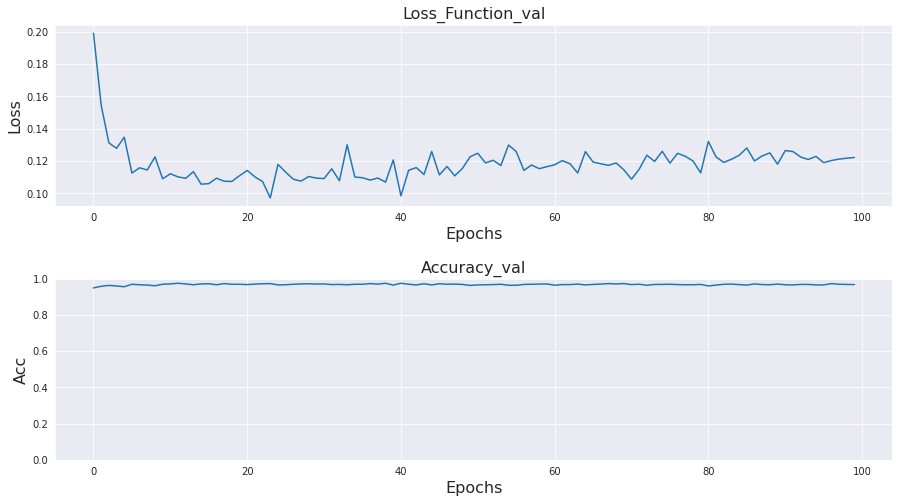

In [ ]:
plot_save_history(model_history)

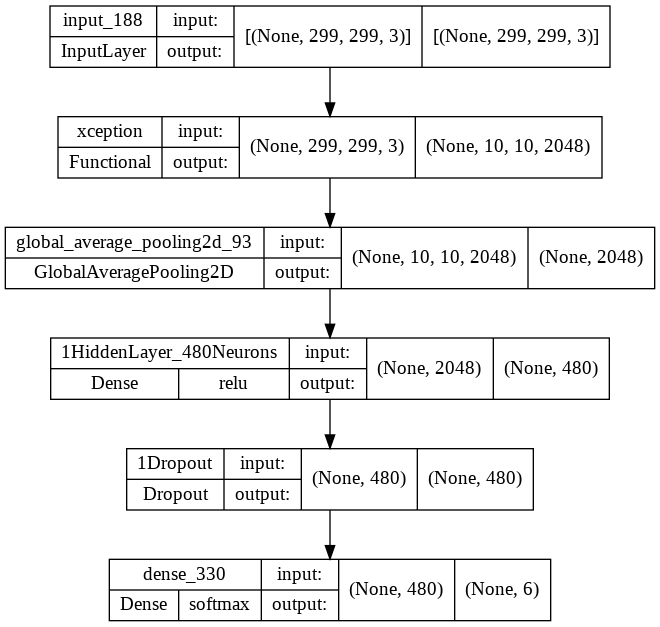

In [ ]:
from tensorflow.keras.utils import plot_model
display(plot_model(model,
                   show_shapes=True,
                   show_layer_names=True,
                   show_layer_activations=True))

# Loading model

In [ ]:
from keras.models import load_model
model_1 = load_model("best_model.h5")

In [ ]:
####
if os.path.exists("Kitchenware_data"):
  shutil.rmtree('Kitchenware_data')

Dir_Data = "Kitchenware_data"
Dir = ("Full_Train", "Test", "Train", "Val")

Full_Train_Size = 0.8
Random_State =  563 #study.best_trial.params['random_state']            

df_Full_Train, df_Test, df_Train, df_Val = Making_Directory(ProjectDirectory= Dir_Data,
                                                            Directories = Dir,
                                                            DataFrame = df_train,
                                                            FullTrainSize = Full_Train_Size,
                                                            RandomState = Random_State)
####
TamImagen =  299
batch_size = 32

train_data_gen = ImageDataGenerator(zoom_range =   [0.80, 1.0],
                                    brightness_range =[0.8,1.2],
                                    vertical_flip = True,  
                                    horizontal_flip = True, 
                                    #shear_range = 30,
                                    #rotation_range = 90,                                
                                    preprocessing_function=keras.applications.xception.preprocess_input)

test_data_gen = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = train_data_gen.flow_from_directory("./Kitchenware_data/Full_Train", 
                                                    (TamImagen, TamImagen),
                                                    batch_size = batch_size,
                                                    class_mode = "categorical")

valid_generator = test_data_gen.flow_from_directory("./Kitchenware_data/Test", 
                                                    (TamImagen, TamImagen),
                                                    batch_size = batch_size,
                                                    class_mode = "categorical")

model_1.evaluate(valid_generator)

Found 4447 images belonging to 6 classes.
Found 1112 images belonging to 6 classes.
35/35 [==============================] - 31s 520ms/step - loss: 0.1102 - accuracy: 0.9739


[0.11018715053796768, 0.9739208817481995]

# Predict

In [ ]:
from PIL import Image

In [ ]:
def normalization(x):
    x /= 127.5
    x -= 1.
    return x

In [ ]:
img_path='fork.jpg'
img = Image.open(img_path)
img_resize = img.resize((299, 299))
img_array = np.array(img_resize, dtype='float32')
img_array_norm = normalization(img_array)
img_reshape = img_array_norm.reshape(1,299,299,3)

In [ ]:
pred = model_1.predict(img_reshape)
pred

1/1 [==============================] - 1s 999ms/step


array([[4.1789963e-06, 9.2529655e-01, 2.7775521e-05, 4.5957766e-04,
        9.2102691e-06, 7.4202716e-02]], dtype=float32)

In [ ]:
classes = np.array(list(train_generator.class_indices.keys()))
classes

array(['cup', 'fork', 'glass', 'knife', 'plate', 'spoon'], dtype='<U5')

In [ ]:
classes[np.argmax(pred[0], axis=-1)]

'fork'

# Predict with test data

In [ ]:
df_test = pd.read_csv('data/test.csv', dtype={'Id': str})
df_test['filename'] = 'data/images/' + df_test['Id'] + '.jpg'
df_test.head()

,Id,filename
0,0678,data/images/0678.jpg
1,3962,data/images/3962.jpg
2,9271,data/images/9271.jpg
3,5133,data/images/5133.jpg
4,8842,data/images/8842.jpg


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


TamImagen =  299
batch_size = 32

test_gen = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)
test_generator = test_gen.flow_from_dataframe(df_test,
                                              x_col = 'filename',
                                              target_size= (TamImagen, TamImagen),
                                              batch_size = batch_size,
                                              class_mode = "input",
                                              shuffle=False)


Found 3808 validated image filenames.


In [ ]:
y_pred = model_1.predict(test_generator)

119/119 [==============================] - 62s 519ms/step


array([[1.0572191e-04, 5.2102543e-02, 1.8506371e-04, 5.2816644e-03,
        8.0316393e-05, 9.4224477e-01],
       [2.7731796e-06, 2.8442661e-03, 1.1773700e-04, 9.9178177e-01,
        1.4195612e-05, 5.2391724e-03],
       [1.8206291e-07, 9.9980897e-01, 7.9782631e-06, 2.0238242e-06,
        1.2714501e-05, 1.6806743e-04],
       ...,
       [1.7057155e-06, 3.0966140e-03, 1.6130098e-05, 1.1749526e-06,
        6.7168339e-06, 9.9687755e-01],
       [3.0951019e-06, 9.8834980e-01, 1.0008611e-05, 2.5904825e-04,
        1.9511155e-05, 1.1358583e-02],
       [4.3228189e-07, 5.2567761e-05, 2.8435047e-06, 5.8497778e-07,
        5.9140444e-07, 9.9994302e-01]], dtype=float32)

In [ ]:
predictions = classes[y_pred.argmax(axis=1)]
predictions

array(['spoon', 'knife', 'fork', ..., 'spoon', 'fork', 'spoon'],
      dtype='<U5')

In [ ]:
df_submission = pd.DataFrame()
df_submission['filename'] = test_generator.filenames
df_submission['label'] = predictions

df_submission['Id'] = df_submission.filename.str[len('data/images/'):-4]
del df_submission['filename']

In [ ]:
df_submission

,label,Id
0,spoon,0678
1,knife,3962
2,fork,9271
3,plate,5133
4,fork,8842
...,...,...
3803,plate,7626
3804,cup,2052
3805,spoon,8827
3806,fork,2299


In [ ]:
df_submission[['Id', 'label']].to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit kitchenware-classification -f submission.csv -m 'validation: 97392'

100% 38.9k/38.9k [00:00<00:00, 59.7kB/s]
Successfully submitted to Kitchenware Classification

# Augmentation

## Zoom

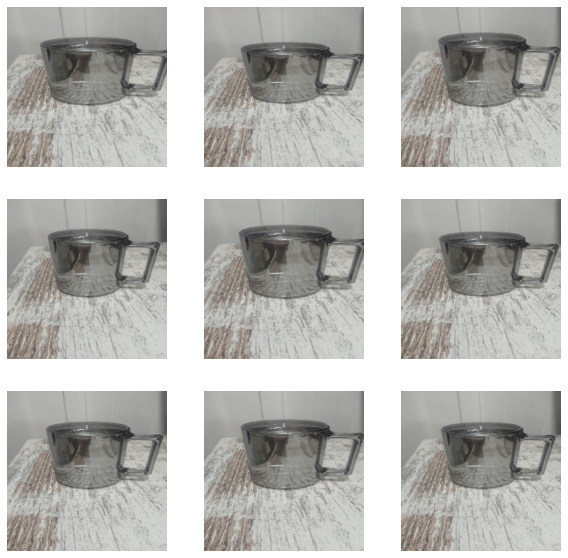

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Loads in image path
imagen = '/content/Kitchenware_data/Val/cup/5192.jpg'
img = keras.utils.load_img(imagen, target_size= (299,299))
img_tensor = keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(zoom_range =   [0.80, 1] )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,10))
#Plots our figures
for i in range(1,10):
  plt.subplot(3, 3, i)
  batch = next(pic)
  image_ = batch[0].astype('uint8')
  plt.axis("off")
  plt.imshow(image_)
plt.show()

## Brightness

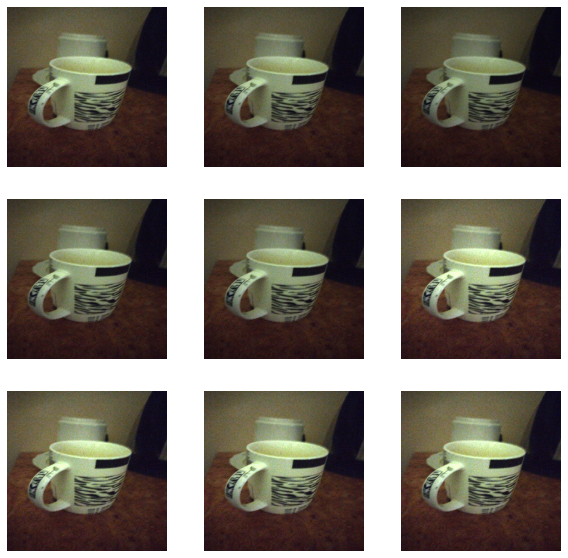

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Loads in image path

imagen = '/content/Kitchenware_data/Val/cup/2545.jpg'
img = keras.utils.load_img(imagen, target_size= (299,299))
img_tensor = keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(brightness_range=[0.8,1.2] )
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,10))
#Plots our figures
for i in range(1,10):
  plt.subplot(3, 3, i)
  batch = next(pic)
  image_ = batch[0].astype('uint8')
  plt.axis("off")
  plt.imshow(image_)
plt.show()

## Rotation

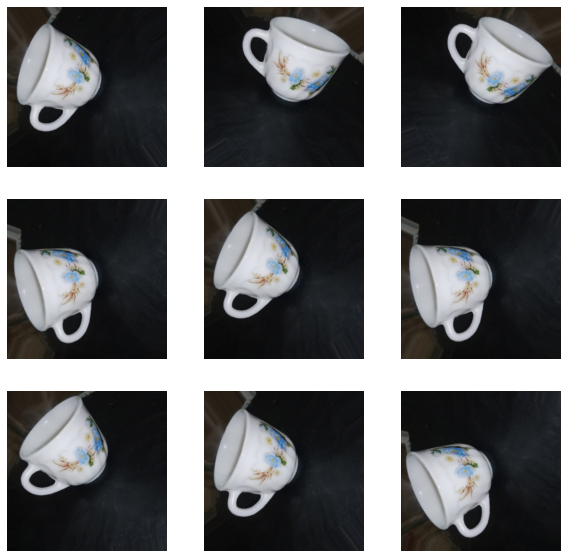

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Loads in image path

imagen = '/content/Kitchenware_data/Val/cup/9114.jpg'
img = keras.utils.load_img(imagen, target_size= (299,299))
img_tensor = keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(rotation_range=90)
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,10))
#Plots our figures
for i in range(1,10):
  plt.subplot(3, 3, i)
  batch = next(pic)
  image_ = batch[0].astype('uint8')
  plt.axis("off")
  plt.imshow(image_)
plt.show()

## Shear

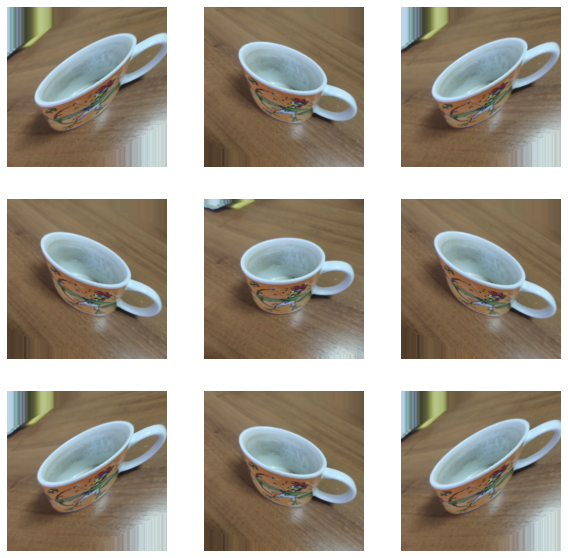

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Loads in image path

imagen = '/content/Kitchenware_data/Val/cup/7587.jpg'
img = keras.utils.load_img(imagen, target_size= (299,299))
img_tensor = keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(shear_range=40)
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,10))
#Plots our figures
for i in range(1,10):
  plt.subplot(3, 3, i)
  batch = next(pic)
  image_ = batch[0].astype('uint8')
  plt.axis("off")
  plt.imshow(image_)
plt.show()